In [ ]:
import numpy as np  # numpy 라이브러리를 np로 import
import pandas as pd  # pandas 라이브러리를 pd로 import
import seaborn as sns  # seaborn 라이브러리를 sns로 import
import matplotlib.pyplot as plt  # matplotlib 라이브러리의 pyplot 모듈을 plt로 import


In [ ]:
raw = pd.read_csv("kaggle_survey_2020_responses.csv", low_memory=False)
raw.head()

In [ ]:
question = raw.iloc[0]
question

# iloc와 loc의 차이

'iloc' 행과 열의 위치(integer position)을 기반으로 데이터를 선택
'loc' 행의 라벨을 기반으로 데이터를 선택

In [ ]:
answer = raw.drop([0]) #0번째 인덱스만 제거하여 질문에 대한 답변만 저장
answer

In [ ]:
answer.shape

In [ ]:
question_no2 = "Q2"
Q2 = answer[question_no2].value_counts()
Q2

In [ ]:
sns.countplot(data=answer, y = question_no2).set_title(question[question_no2])

In [ ]:
sns.barplot(x = Q2.index, y=Q2.values)
sns.set_style("whitegrid")
plt.title(question[question_no2])
plt.show()

In [ ]:
ManWo = ["Man", "Woman"]

In [ ]:
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])

q1q2[ManWo].plot.bar(rot=0)

rot=0은 x축 레이블을 회전하지않고 수평으로 유지하도록 저장

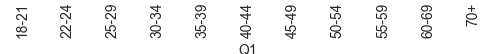
<br>
rot = 90이 되니 x축이 회전한 모습

In [ ]:
q1q2[ManWo].sort_index(ascending=False).plot.barh(title = "Age & Gender")

In [ ]:
order_list = [x for x in answer["Q5"]]
order_list = set(order_list)

real_order_list = list(order_list)


In [ ]:
real_order_list

In [ ]:
def show_countplot_by_question_number(qno, fsize = (10,6), order = None, palette = None):
    if not order:
        order = answer[qno].value_counts().index
    plt.figure(figsize = fsize)
    sns.countplot(data=answer, y = qno, order = order, palette=palette).set_title(question[qno])


show_countplot_by_question_number("Q5", palette="Greens_r")

### order 
카테고리를 정렬하는 방법을 지정하는 매개변수
<br>
order = ["카테고리1", "카테고리2", "카테고리3"] 
<br>
order라는 리스트의 순서대로 정렬이 됨
<br>
잘 사용되면 value_counts().sort()등을 사용하지 않아도 될수도..?


In [ ]:
show_countplot_by_question_number("Q6", palette="Greens_r")

In [ ]:
answer_Q7 = answer.filter(regex="Q7")
# print(answer_Q7.isnull().sum())

answer_Q7_desc = answer_Q7.describe()
print(answer_Q7_desc)

In [ ]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count.plot.bar(rot=45)

In [ ]:
sns.barplot(data = answer_Q7_count, x = answer_Q7_count.index, y = "count").set_title("Programming Tools")
plt.xticks(rotation=45)
plt.show()

In [ ]:
q6_index = answer["Q6"].value_counts().index.tolist()
show_countplot_by_question_number("Q6", order = q6_index)

In [ ]:
q7_title = question.filter(regex="Q7")[0].split("-")[0]
sns.barplot(data = answer_Q7_count, y = answer_Q7_count.index, x = "count").set_title(q7_title)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
def get_question_title(qno):
    if qno in question.index:
        return question[qno]
    else:
        return question.filter(regex=qno)[0].split("-")[0]   
    
get_question_title("Q7")

In [ ]:
def get_multiple_choice_answer_by_qno(qno):
    answer_count = answer.filter(regex=qno).describe().loc[["top", "count"]].T.set_index("top").sort_values(by = "count", ascending=False)
    return answer_count

In [ ]:
get_multiple_choice_answer_by_qno("Q9")

In [ ]:
def get_multiple_choice_bar_plot_by_qno(qno, palette = None):
    answer_count = get_multiple_choice_answer_by_qno(qno)
    return sns.barplot(data = answer_count, x = "count" , y =answer_count.index, palette = palette).set_title(get_question_title(qno))

In [ ]:
get_multiple_choice_bar_plot_by_qno("Q7", palette = "Blues_r")

In [ ]:
q7_cols = answer.filter(regex = "Q7").describe().loc["top"].tolist()
q2q7 = answer.filter(regex="Q7|Q2$") # $는 정규표현식에서 끝을 의미함 그러니까 Q2로 끝나는 문자를 찾는다는 것
q2q7_count = q2q7.groupby("Q2").count()
q2q7_count.columns = q7_cols
q2q7_count

In [ ]:
def show_multiple_choice_bar_plot_by_qno(qno):
    
    return 0